# What is Z-Test?

It is statistical hypothesis test used to determine whether there is a significant difference between the mean of a sample and the population mean. It is particularly useful when the population standard deviation is know. The test statistic follows a standard normal distribution (Z-distribuion) under the null hypothesis.

### Significance Level, 𝛼

It is a critical threshold used in hypothesis testing to determine whether to reject the null hypothesis. It represents the maximum probability of making a Type 1 error, which occurs when we incorrectly reject the null hypothesis when it is actually true.

Commonly used significance levels include 0.05 (5%), 0.01 (1%) and 0.10 (10%)

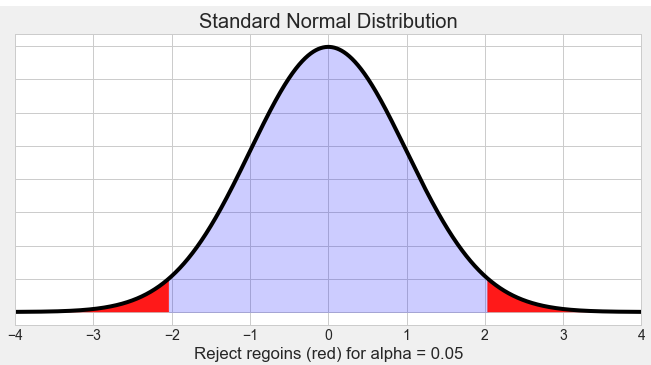

### Rejection Region

In hypothesis testing, the rejection region (also know as the critical region) is the range of values of the test statistic for which the null hypothesis is rejected. It is determined based on the chosen significance level (𝛼) and the sampling distribution of the test statistic under the null hypothesis.

In [1]:
import numpy as np
import scipy.stats as stats

### 1. Z-test for One-Sample Mean:

This test is used when you have a single saqmple and want to compare its mean to know population mean. The null hypothesis typically states that there is no difference between the sample mean and the population mean.

The formula for the test statistic in one-sample Z-test is:

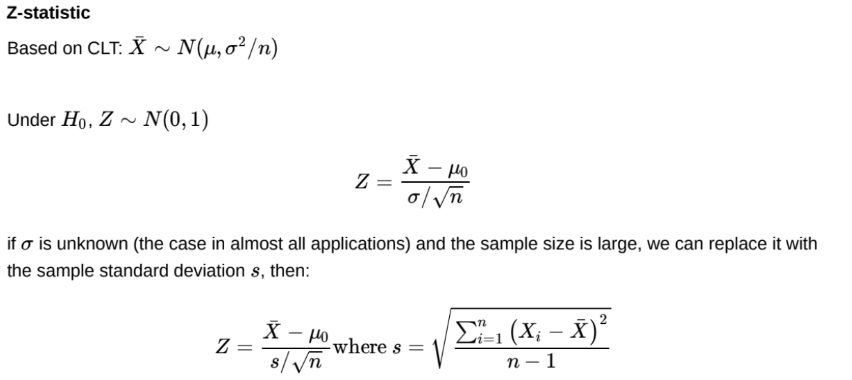

Where:

- X̄ is the sample mean
- 𝜇 is the population mean
- 𝜎 is the population standard deviation
- 𝑛 is the sample size

### One-Tail Z-Test

In a one-tail (or one-sided) Z-test, the critical region (rejection region) is located entirely in one tail of the sampling distribution.

**Left-tailed Test:** In this test, our region of rejection is located to the extreme left of the distribution, here our null hypothesis is that the claimed value is less than or equal to the mean population value.

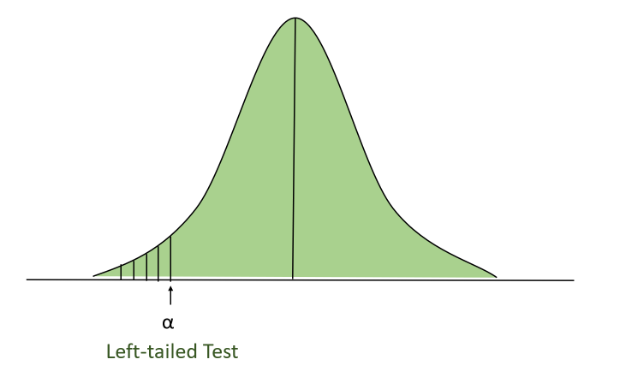

**Right-tailed Test:** In this test, our region of rejection is located to the extreme right of the distribution. Here our null hypothesis is that the claimed value is less than or equal to the mean population value.

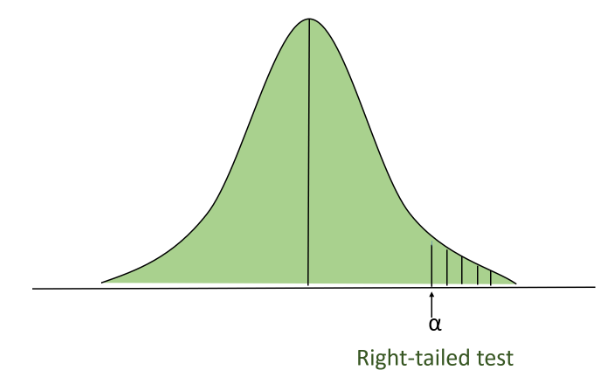

The decision to reject the null hypothesis occurs when the test statistics falls in the critical region corresponding to the specified direction.

**Note:** One-tailed are appropriate when there is a specify hypothesis about the direction of the difference between the sample mean and the population mean.

### Question:

Suppose a company is evaluation the impact of new training program on productivity of its employees  μ = 50 and σ = 5. After training from sample_size 30, sample mean is 53. The company wants to know if new training program has any significance on productivity increase.

**Null Hypothesis HO : μ = 50**

**Alternative Hypothesis Ha: μ> 50**

In [2]:
X̄ = 53 # sample_mean
μ = 50 # population_mean 
n = 30 # sample_size 
σ = 5 # population_std 

In [3]:
# compute the z-score
z_score = (X̄-μ)/(σ/np.sqrt(n))
print('Z-Score :',z_score)

Z-Score : 3.2863353450309964


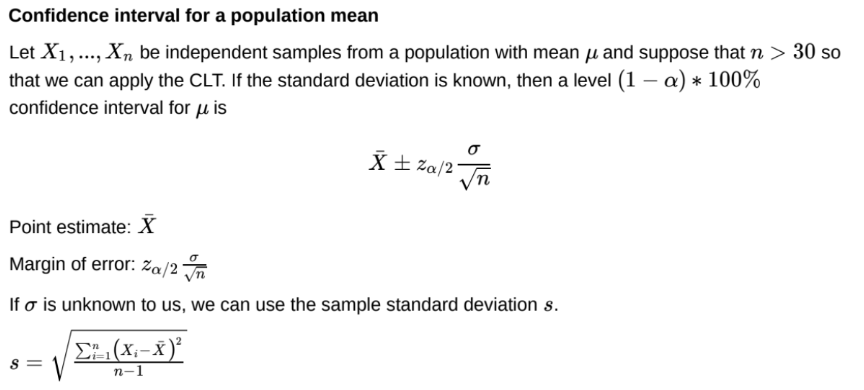

In [4]:
alpha= 0.05

In [5]:
#critical Z-score
def z_test(alpha, z_score):
    z_critical= stats.norm.ppf(1-alpha)
    print("Critical Z-Score :", z_critical)

    #Hypothesis
    if z_score > z_critical:
        print("Reject Null Hypothesis")
    else:
        print("Fail to Reject Null Hypothesis")

In [6]:
z_test(alpha, z_score)

Critical Z-Score : 1.6448536269514722
Reject Null Hypothesis


In [8]:
# P-Value : Probability of getting less than a z-score 
def p_value(z_score):
    p_value= 1- stats.norm.cdf(z_score)

    print("p-vlaue :", p_value)

    #Hypothesis
    if p_value < alpha:
        print("Reject Null Hypothesis")
    else:
        print("Fail to Reject Null Hypothesis")

In [9]:
p_value(z_score)

p-vlaue : 0.0005075004735565214
Reject Null Hypothesis


### Two-tail Z-test

In a two-tail (or two-sided) Z-test, the critical region is divided into two tails of the sampling distribution, representing extreme values in either direction from the population mean.

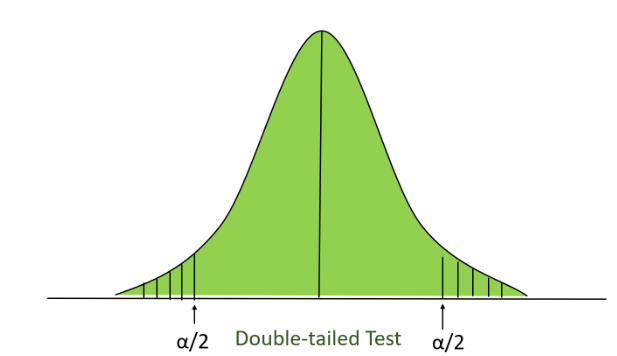

The decision to reject the null hypothesis occurs when the absolute value of the test statistic falls in either tails of the critical region.

**Note:** Two-tail tests are appropriate when there is no specific hypothesis about the direction of the difference, and you want to test whether the sample mean is significantly different from the population mean, regardless of direction.

### Question:

Suppose a snack food company claims that the packet of there wafers have average weight= 50gms. To verify this a consumer watchdog organisation decided to do a test on random sample of 40 wafers packets. They find sample has average weight of 49 gms and known population standard devition is 4 gms.

**Null Hypothesis HO : μ = 50**

**Alternative Hypothesis Ha : μ ≠ 50**

In [10]:
X̄ = 49 # sample_mean
μ = 50 # population_mean 
n = 40 # sample_size 
σ = 4 # population_std 

In [11]:
# compute the z-score
z_score = (X̄-μ)/(σ/np.sqrt(n))
print('Z-Score :',z_score)

Z-Score : -1.5811388300841895


In [12]:
z_test(alpha, z_score)

Critical Z-Score : 1.6448536269514722
Fail to Reject Null Hypothesis


In [13]:
p_value(z_score)

p-vlaue : 0.9430768509966709
Fail to Reject Null Hypothesis


### 2. Z-Test for Comparing the Means of Two Populations

This test is used to compare the means of two independent samples when the population standard deviation are known. The null hypothesis typically states that there is no difference between the means of the two populations.

The formula for the test statistic in a two-sample Z-test is similiar to the one-sample Z-test, but it involves the difference between the means of the two samples

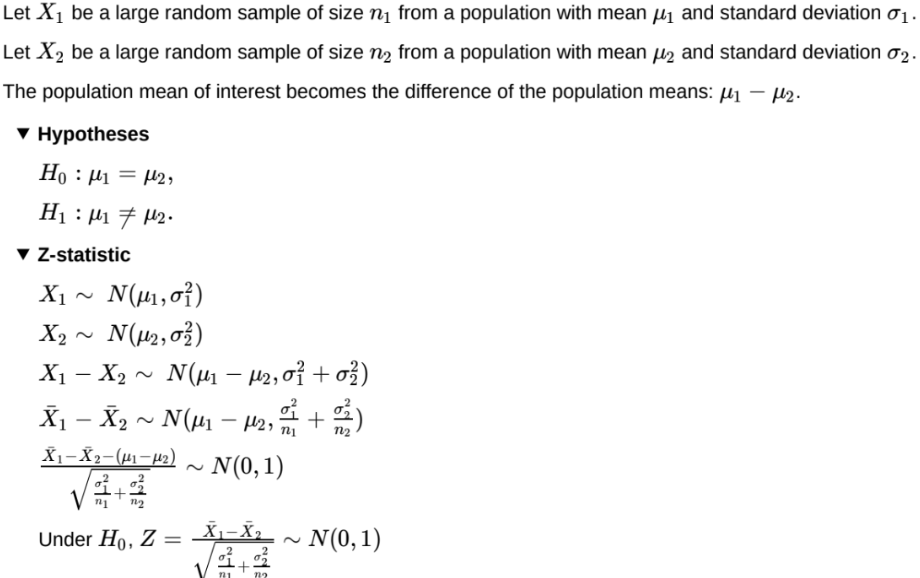

Where,

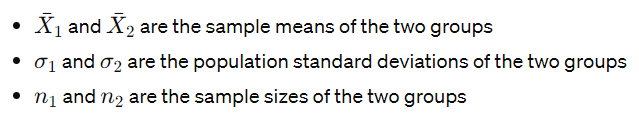

### Question:

Does a new teaching method lead to a significant improvement in student's test score compared to the traditional method?

In [14]:
# Generate random test scores for two groups
np.random.seed(123)
sample_size= 30
scores_new_method= np.random.normal(loc=75, scale=10, size=sample_size) # New teaching method
scores_traditional_method= np.random.normal(loc=70, scale=10, size= sample_size) # Traditional method

# Perform two-sample Z-test
z_stat, p_value= stats.ttest_ind(scores_new_method, scores_traditional_method)

# Set significance level
alpha=0.05

#Print results
print("Two-sample Z-test results:")
print("Z-statistics:", z_stat)
print("P-value:", p_value)

# Interpret the results
if p_value< alpha:
    print("Reject the null hypothesis: There is a significant difference in test scores between the two groups,")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in test scores between the two groups .")

Two-sample Z-test results:
Z-statistics: 1.290510429939904
P-value: 0.2019944589487864
Fail to reject the null hypothesis: There is no significant difference in test scores between the two groups .
